##### Properties of SVD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_utils import svd

np.set_printoptions(linewidth=200)

In [2]:
def matrix_column_l2_norm(M):
    """Returns the l2 norm of each column of matrix M, """
    return (M ** 2).sum(0)

In [4]:
# Generate random m x n matrix, M
m, n = 10, 5
np.random.seed(123)      # reproducibility
M = np.random.randn(m, n)
print(M)

[[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
 [ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]
 [-0.67888615 -0.09470897  1.49138963 -0.638902   -0.44398196]
 [-0.43435128  2.20593008  2.18678609  1.0040539   0.3861864 ]
 [ 0.73736858  1.49073203 -0.93583387  1.17582904 -1.25388067]
 [-0.6377515   0.9071052  -1.4286807  -0.14006872 -0.8617549 ]
 [-0.25561937 -2.79858911 -1.7715331  -0.69987723  0.92746243]
 [-0.17363568  0.00284592  0.68822271 -0.87953634  0.28362732]
 [-0.80536652 -1.72766949 -0.39089979  0.57380586  0.33858905]
 [-0.01183049  2.39236527  0.41291216  0.97873601  2.23814334]]


In [5]:
# Run the SVD
U, S, V = svd(M)
print(U)

[[-0.161  0.401 -0.418  0.028  0.013 -0.462 -0.271 -0.014 -0.376  0.457]
 [ 0.42  -0.47   0.207  0.392  0.091  0.133 -0.227  0.115 -0.372  0.42 ]
 [-0.086  0.331  0.012  0.424 -0.173  0.366  0.463 -0.239  0.205  0.474]
 [-0.501 -0.041  0.288  0.265 -0.373 -0.061  0.209  0.203 -0.547 -0.261]
 [-0.133 -0.582 -0.382 -0.033 -0.083 -0.358  0.48   0.207  0.203  0.215]
 [-0.033 -0.097 -0.533 -0.29  -0.333  0.648 -0.125  0.158 -0.224  0.014]
 [ 0.519  0.234  0.127 -0.43  -0.016 -0.084  0.551  0.071 -0.396  0.04 ]
 [-0.046  0.278  0.048  0.092  0.289  0.118  0.02   0.88   0.178  0.075]
 [ 0.252  0.083  0.215 -0.072 -0.782 -0.222 -0.244  0.2    0.315  0.135]
 [-0.431 -0.138  0.452 -0.558  0.095  0.117 -0.075 -0.036  0.015  0.499]]


In [6]:
np.round(np.dot(U.T, U), 2)

array([[ 1., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.],
       [-0.,  1., -0., -0., -0., -0.,  0., -0., -0., -0.],
       [ 0., -0.,  1.,  0., -0., -0., -0., -0., -0.,  0.],
       [-0., -0.,  0.,  1., -0., -0., -0.,  0., -0., -0.],
       [ 0., -0., -0., -0.,  1., -0.,  0., -0.,  0., -0.],
       [ 0., -0., -0., -0., -0.,  1.,  0., -0.,  0.,  0.],
       [-0.,  0., -0., -0.,  0.,  0.,  1., -0., -0.,  0.],
       [-0., -0., -0.,  0., -0., -0., -0.,  1.,  0.,  0.],
       [ 0., -0., -0., -0.,  0.,  0., -0.,  0.,  1., -0.],
       [ 0., -0.,  0., -0., -0.,  0.,  0.,  0., -0.,  1.]])

In [7]:
# Calculate L2 norm of U and V^T
U_norm = matrix_column_l2_norm(U)
V_norm = matrix_column_l2_norm(V.T)

print(U_norm)
print(V_norm)

[1.000238 0.999049 0.999636 0.99955  0.999612 1.000831 0.998207 1.000301 1.000329 0.998918]
[0.999828 1.000826 1.00021  0.999178 0.999782]


Text(0.5, 1.0, '$VV^T$')

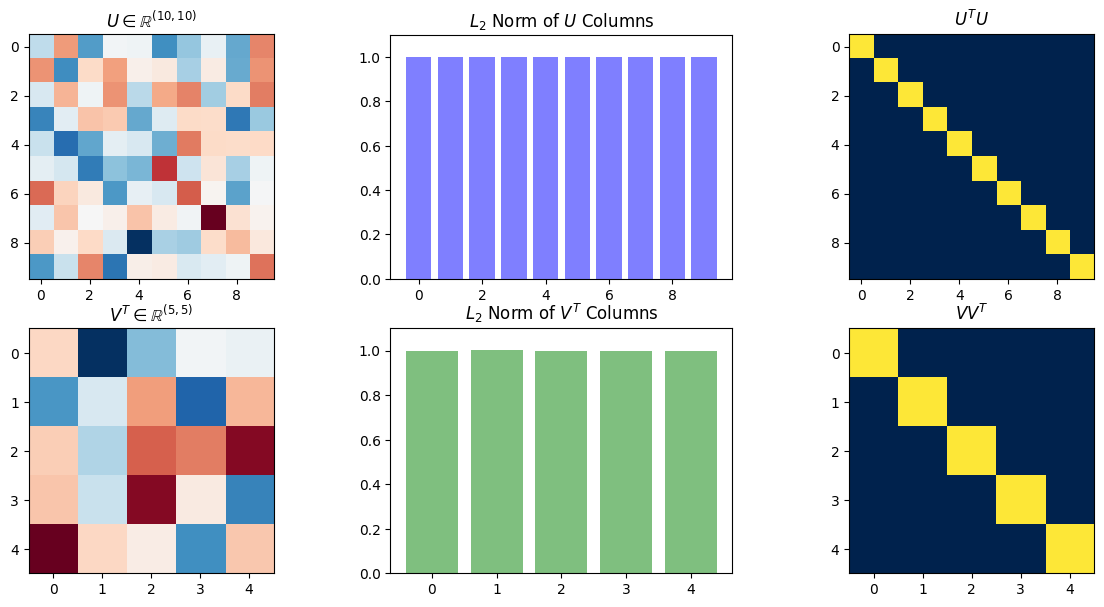

In [20]:
# Visualizations
fig, axs = plt.subplots(2, 3, figsize=(15, 7))

## Matrix U
plt.sca(axs[0][0])
plt.imshow(U, interpolation='nearest')
plt.title(f"$U \in \mathbb{{R}}^{{{U.shape}}}$")

## L2 norm of U's columns
plt.sca(axs[0][1])
plt.gca().set_aspect(7.)       # get the current Axes and set the ratio of height/width to 7.
plt.bar(range(m), U_norm, facecolor='blue', alpha=0.5)
plt.ylim([0, 1.1])
plt.title('$L_2$ Norm of $U$ Columns')

## U^TU is a Identity Matrix
plt.sca(axs[0][2])
plt.imshow(U.T @ U, cmap='cividis', interpolation='nearest')
plt.title("$U^TU$")

## Matrix V
plt.sca(axs[1][0])
cax1 = plt.imshow(V.T, interpolation='nearest')
plt.title(f"$V^T \in \mathbb{{R}}^{{{V.shape}}}$")

## L2 norm of V^T's columns
plt.sca(axs[1][1])
plt.bar(range(n), V_norm, facecolor='green', alpha=0.5)
plt.ylim([0, 1.1])
plt.title("$L_2$ Norm of $V^T$ Columns")

## VV^T is a Identity Matrix
plt.sca(axs[1][2])
cax2 = plt.imshow(V @ V.T, cmap='cividis', interpolation='nearest')
plt.title("$VV^T$")